<center>

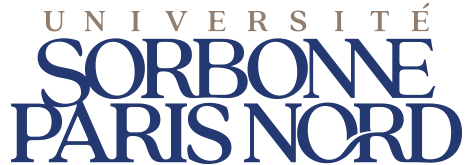

</center>

<h1><center><strong style="color: #293358">NoSQL<br/> BUT 3 - IUT Villetaneuse <br/> Introduction à MongoDB</strong></center></h1>

<center>
<h3 style="color: #8b7d6d"><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@sorbonne-paris-nord.fr</email>
<br/>
Year 2025-2026

Original Content

Licenced under Affero GNU3
</center>

## <strong style="color: #8b7d6d">Usage de la machine virtuelle</strong>

1. Téléchargez la VM ici : https://e.pcloud.link/publink/show?code=XZ3dvxZh0fEzIaCmqF9HHRP346u0S0MY4lk
2. Importez la dans Virtual Box
3. Connectez-vous avec l'id `uspn`et le mot de passe `uspn`
4. Enjoy !


Cette machine virtuelle est déjà configurée pour Redis et il vous suffit de lancer les quelques commandes de la section suivante pour y installer MongoDB.

## <strong style="color: #8b7d6d">Installation de mongodb</strong>

### Installer MongoDB par docker 
1. Télécharger Docker Desktop et l'installer: https://docs.docker.com/desktop/
2. Lancer Docker Desktop (cela lance le deamon docker en service de fond - background service)
3. Ouvrir le terminal
4. Taper cette commande dans le terminal
```
docker run --name mongodb -d -p 27017:27017 mongodb/mongodb-community-server:latest
```
Cela télécharge l'image docker de mongdb et crée un container au nom de `mongodb`. Le serveur mongodb écoutera le port 27017
5. Vérifier les containers docker en cours d'exécution en tapant la commande suivante dans le terminal
```
docker ps
```
6. Vérifier les containers dockers disponibles en tapant la commande suivante dans le terminal
```
docker ps -a
```
`-a` signifie `all`
7. Si le container `mongodb` n'est pas en cours d'exécution, vous pouvez le lancer en tapant dans le terminal
```
docker start mongodb
```
8. Vous pouvez arrêter le container en tapant dans le terminal
```
docker stop mongodb
```
9. Si vous souhaitez supprimer le container, tapez dans le terminal
```
docker stop mongodb && docker rm mongodb
```
10. Installez l'interface graphique de MongoDB, nommée Mongo Compass : https://www.mongodb.com/products/tools/compass 

### Utiliser MongoDB via docker

#### Par terminal Mongo Shell (mongosh)
Comme la commande `mongosh`est diponible que dans le container nous pouvons la lancer comme ceci :
```
docker exec -it mongodb mongosh
```
Ce qui signgifie `exec`(executer) `-it` (interactive terminal) `mongodb` (le nom du container pour lancer le terminal interactif) `mongosh` (dans ce terminal interactif je lance la commande `mongosh`)

### Ubuntu 24.04 LTS et installation native

L'installation de mongodb, de pymongo et de mongo compass est déjà faite dans la VM 😉

À toute fin utile, voici les commandes pour l'installation sous Ubuntu :

In [ ]:
! sudo apt update ; sudo apt-get install gnupg curl
! curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg --dearmor
! echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu noble/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list
! sudo apt update ; sudo apt-get install -y mongodb-org wget

In [ ]:
! pip install pymongo pandas --break-system-packages

In [ ]:
! wget https://downloads.mongodb.com/compass/mongodb-compass_1.44.4_amd64.deb
! sudo apt install ./mongodb-compass_1.44.4_amd64.deb

In [ ]:
! wget https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json

### Windows / MacOS

1. Téléchargez MongoDB Community Edition : https://www.mongodb.com/try/download/community
2. Installez le en mettant tout par défaut
3. Téléchargez Mongo Compass : https://www.mongodb.com/products/tools/compass 
4. Installez le.
5. Installez `pandas`, `pymongo` et `wget` : 

In [ ]:
! pip install pymongo pandas wget

6. Téléchargez la base des pokemons : 

In [7]:
import wget
url = "https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json"
wget.download(url)

ModuleNotFoundError: No module named 'wget'

## <strong style="color: #8b7d6d">Lancement du service Mongodb (`mongod` pour installation native)</strong>

### Ubuntu 24.04 LTS

In [ ]:
! sudo service mongod start
! sudo service mongod status

### Windows 10 / 11

Lancez une invite de commande (ou un Windows Terminal) en administrateur, puis exécutez :

```sh
net start MongoDB
```

# <strong style="color: #8b7d6d">CRUD (Create Read Update Delete) en MongoDB</strong>

In [10]:
import pymongo, json
import pandas as pd

#### 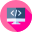 **TODO!**

Ouvrez le fichier JSON dans Pandas et affichez le en format String.

💡Astuce :
- Voici une introduction officielle de 10 minutes pour Pandas : https://pandas.pydata.org/docs/user_guide/10min.html 

In [11]:
df = pd.read_json("pokemons.json")


#### 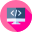 **TODO!**

Affichez le dataframe réorienté en "records", donc avec une orientation par rangées de la table

In [12]:
records = df.to_dict(orient="records")

print(records[486])

{'Number': 487, 'Name': 'Giratina', 'Type_1': 'Ghost', 'Type_2': 'Dragon', 'Total': 680, 'HP': 150, 'Attack': 120, 'Defense': 100, 'Sp_Atk': 120, 'Sp_Def': 100, 'Speed': 90, 'Generation': 4, 'isLegendary': True, 'Color': 'Black', 'hasGender': False, 'Pr_Male': nan, 'Egg_Group_1': 'Undiscovered', 'Egg_Group_2': None, 'hasMegaEvolution': False, 'Height_m': 6.91, 'Weight_kg': 650.0, 'Catch_Rate': 3, 'Body_Style': 'serpentine_body'}


#### 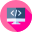 **TODO!**

Connectez votre client mongodb à votre service mongodb en localhost. Puis créez la base de données `but3` et sa collection `pokemons`.

💡 Astuces :
- La documentation de pymongo : https://pymongo.readthedocs.io/en/stable/genindex.html

In [36]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")

db = client["but3"]

collection = db["pokemons"]


#### 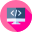 **TODO!**

Insérez-y directement la liste des pokemons (représentés chacun par un dictionnaire -- l'orientation `records`).

💡 Astuces :
- n'oubliez pas de récupérer le résultat de l'insertion


In [31]:
result = collection.insert_many(records)

print(result)

BulkWriteError: batch op errors occurred, full error: {'writeErrors': [{'index': 0, 'code': 11000, 'errmsg': "E11000 duplicate key error collection: but3.pokemons index: _id_ dup key: { _id: ObjectId('68df88aaf2d74a8e2503ea36') }", 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('68df88aaf2d74a8e2503ea36')}, 'op': {'Number': 1, 'Name': 'Bulbasaur', 'Type_1': 'Grass', 'Type_2': 'Poison', 'Total': 318, 'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp_Atk': 65, 'Sp_Def': 65, 'Speed': 45, 'Generation': 1, 'isLegendary': False, 'Color': 'Green', 'hasGender': True, 'Pr_Male': 0.875, 'Egg_Group_1': 'Monster', 'Egg_Group_2': 'Grass', 'hasMegaEvolution': False, 'Height_m': 0.71, 'Weight_kg': 6.9, 'Catch_Rate': 45, 'Body_Style': 'quadruped', '_id': ObjectId('68df88aaf2d74a8e2503ea36')}}], 'writeConcernErrors': [], 'nInserted': 0, 'nUpserted': 0, 'nMatched': 0, 'nModified': 0, 'nRemoved': 0, 'upserted': []}

In [32]:
# la récupération d'un élément dans une collection donne un cursor (un itérable)
print(collection.find())

#### 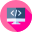 **TODO!**

Affichons le cursor sous forme de liste issue de la collection. Désormais, les éléments ont un _id qui est un objet instancié (qui peut être mis mauellement lors de l'insertion), donc pas serializable dans un JSON normal 😉

💡 Astuces :
- la méthode `.to_list()` peut être pratique

In [37]:
pokemons = list(collection.find())
print(pokemons[486])

{'_id': ObjectId('68df88aaf2d74a8e2503ec1c'), 'Number': 487, 'Name': 'Giratina', 'Type_1': 'Ghost', 'Type_2': 'Dragon', 'Total': 680, 'HP': 150, 'Attack': 120, 'Defense': 100, 'Sp_Atk': 120, 'Sp_Def': 100, 'Speed': 90, 'Generation': 4, 'isLegendary': True, 'Color': 'Black', 'hasGender': False, 'Pr_Male': nan, 'Egg_Group_1': 'Undiscovered', 'Egg_Group_2': None, 'hasMegaEvolution': False, 'Height_m': 6.91, 'Weight_kg': 650.0, 'Catch_Rate': 3, 'Body_Style': 'serpentine_body'}


#### 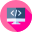 **TODO!**

Affichez le premier élément

In [38]:
premier_elem = collection.find_one()
print(premier_elem)

{'_id': ObjectId('68df88aaf2d74a8e2503ea36'), 'Number': 1, 'Name': 'Bulbasaur', 'Type_1': 'Grass', 'Type_2': 'Poison', 'Total': 318, 'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp_Atk': 65, 'Sp_Def': 65, 'Speed': 45, 'Generation': 1, 'isLegendary': False, 'Color': 'Green', 'hasGender': True, 'Pr_Male': 0.875, 'Egg_Group_1': 'Monster', 'Egg_Group_2': 'Grass', 'hasMegaEvolution': False, 'Height_m': 0.71, 'Weight_kg': 6.9, 'Catch_Rate': 45, 'Body_Style': 'quadruped'}


#### 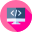 **TODO!**

Affichez l'identifiant du premier élément de la collection.

Qu'est-ce que cet identifiant ? De quel type est-il ?

In [46]:
doc = collection.find_one()

print("voici l'id du pokemon", doc["_id"])
print("voici son type principal", doc["Type_1"])
print("voici son type secondaire", doc["Type_2"])    

voici l'id du pokemon 68df88aaf2d74a8e2503ea36
voici son type principal Grass
voici son type secondaire Poison


#### 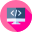 **TODO!**

Affichez le numéro du pokémon le plus mignon de l'univers.... carapuce !

<img height="100px" src="https://www.pokepedia.fr/images/thumb/c/cc/Carapuce-RFVF.png/800px-Carapuce-RFVF.png">

💡Astuce :
- `find_one()` et `find()` acceptent des arguments 😉

In [54]:
num1 = collection.find_one({"Name": "Squirtle"})

print(num1["Number"])

7


#### 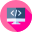 **TODO!**

Affichez désormais uniquement les noms des pokemons avec leur premier type, un par ligne, en excluant l'id

In [72]:
collection.find({}, {"_id": 0, "Name": 1, "Type_1": 1})

for doc in pokemons:
    print(doc["Name"], "-", doc["Type_1"])

Bulbasaur - Grass
Ivysaur - Grass
Venusaur - Grass
Charmander - Fire
Charmeleon - Fire
Charizard - Fire
Squirtle - Water
Wartortle - Water
Blastoise - Water
Caterpie - Bug
Metapod - Bug
Butterfree - Bug
Weedle - Bug
Kakuna - Bug
Beedrill - Bug
Pidgey - Normal
Pidgeotto - Normal
Pidgeot - Normal
Rattata - Normal
Raticate - Normal
Spearow - Normal
Fearow - Normal
Ekans - Poison
Arbok - Poison
Pikachu - Electric
Raichu - Electric
Sandshrew - Ground
Sandslash - Ground
Nidoran♀ - Poison
Nidorina - Poison
Nidoqueen - Poison
Nidoran♂ - Poison
Nidorino - Poison
Nidoking - Poison
Clefairy - Fairy
Clefable - Fairy
Vulpix - Fire
Ninetales - Fire
Jigglypuff - Normal
Wigglytuff - Normal
Zubat - Poison
Golbat - Poison
Oddish - Grass
Gloom - Grass
Vileplume - Grass
Paras - Bug
Parasect - Bug
Venonat - Bug
Venomoth - Bug
Diglett - Ground
Dugtrio - Ground
Meowth - Normal
Persian - Normal
Psyduck - Water
Golduck - Water
Mankey - Fighting
Primeape - Fighting
Growlithe - Fire
Arcanine - Fire
Poliwag - Wat

KeyError: 'Name'

#### 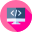 **TODO!**

Combien de pokemons ont un nom commençant par A ?

💡 Astuces :
- vive les expressions régulières

In [70]:
count = collection.count_documents({"Name": {"$regex": "^A"}})
print("Nombre de pokémons dont le nom commence par A :", count)

Nombre de pokémons dont le nom commence par A : 33


#### 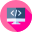 **TODO!**

Afficher le nom des pokemons ayant un nom commençant par A et affichez les séparés par une barre verticale. 

Puis, triez les par ordre alphabétique avec python et affichez-les.

Enfin, triez les par ordre alphabétique de nouveau mais à l'aide de mongodb (donc directement lors de la requête).

💡 Astuces :
- vous pourriez avoir besoin de `list comprehension` et autres astuces pratiques de python

In [71]:
# afficher le nom des pokemons ayant un nom commençant par A
pokemons_cursor = collection.find(
    {"Name": {"$regex": "^A"}},  # noms commençant par A
    {"_id": 0, "Name": 1}        # inclure seulement Name
)

pokemons_names = [doc["Name"] for doc in pokemons_cursor]
print("Pokémons commençant par A :")
print(" | ".join(pokemons_names))

# les trier par ordre alphabétique avec python et les afficher

pokemons_names_sorted = sorted(pokemons_names)
print("\nTri alphabétique avec Python :")
print(" | ".join(pokemons_names_sorted))

# les trier par ordre alphabétique avec mongodb (donc directement lors de la requête)
pokemons_cursor_sorted = collection.find(
    {"Name": {"$regex": "^A"}},
    {"_id": 0, "Name": 1}
).sort("Name", 1)  # 1 = ordre croissant

pokemons_names_mongo = [doc["Name"] for doc in pokemons_cursor_sorted]
print("\nTri alphabétique avec MongoDB :")
print(" | ".join(pokemons_names_mongo))

Pokémons commençant par A :
Arbok | Arcanine | Abra | Alakazam | Aerodactyl | Articuno | Ariados | Ampharos | Azumarill | Aipom | Azurill | Aron | Aggron | Altaria | Anorith | Armaldo | Absol | Ambipom | Abomasnow | Azelf | Arceus | Audino | Archen | Archeops | Amoonguss | Alomomola | Axew | Accelgor | Aegislash | Aromatisse | Amaura | Aurorus | Avalugg

Tri alphabétique avec Python :
Abomasnow | Abra | Absol | Accelgor | Aegislash | Aerodactyl | Aggron | Aipom | Alakazam | Alomomola | Altaria | Amaura | Ambipom | Amoonguss | Ampharos | Anorith | Arbok | Arcanine | Arceus | Archen | Archeops | Ariados | Armaldo | Aromatisse | Aron | Articuno | Audino | Aurorus | Avalugg | Axew | Azelf | Azumarill | Azurill

Tri alphabétique avec MongoDB :
Abomasnow | Abra | Absol | Accelgor | Aegislash | Aerodactyl | Aggron | Aipom | Alakazam | Alomomola | Altaria | Amaura | Ambipom | Amoonguss | Ampharos | Anorith | Arbok | Arcanine | Arceus | Archen | Archeops | Ariados | Armaldo | Aromatisse | Aron 

#### 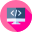 **TODO!**

Affichez un dict pour représenter les données par type principal du pokemon, puis créez une collection par type

In [78]:
for doc in collection.find({}, {"_id": 0, "Name": 1, "Type_1": 1}):
    type_principal = doc.get("Type_1")  # .get() renvoie None si le champ n'existe pas
    name = doc.get("Name")
    if type_principal and name:  # on ignore les documents sans Type_1 ou Name
        if type_principal not in pokemons_by_type:
            pokemons_by_type[type_principal] = []
        pokemons_by_type[type_principal].append(name)

# Affichage
for type_p, names in pokemons_by_type.items():
    print(type_p, ":", names)

#créez une collection par type
for type_p, names in pokemons_by_type.items():
    type_collection = db[type_p]  # la collection est créée automatiquement
    # Préparer les documents à insérer
    docs = [{"Name": name} for name in names]
    # Insérer les documents
    if docs:  # éviter d'insérer une liste vide
        type_collection.insert_many(docs)
    print(f"Collection '{type_p}' créée avec {len(docs)} pokémons")

Grass : ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Oddish', 'Gloom', 'Vileplume', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Exeggcute', 'Exeggutor', 'Tangela', 'Chikorita', 'Bayleef', 'Meganium', 'Bellossom', 'Hoppip', 'Skiploom', 'Jumpluff', 'Sunkern', 'Sunflora', 'Treecko', 'Grovyle', 'Sceptile', 'Seedot', 'Nuzleaf', 'Shiftry', 'Shroomish', 'Breloom', 'Roselia', 'Cacnea', 'Cacturne', 'Tropius', 'Turtwig', 'Grotle', 'Torterra', 'Budew', 'Roserade', 'Cherubi', 'Cherrim', 'Carnivine', 'Snover', 'Abomasnow', 'Tangrowth', 'Leafeon', 'Shaymin', 'Snivy', 'Servine', 'Serperior', 'Pansage', 'Simisage', 'Cottonee', 'Whimsicott', 'Petilil', 'Lilligant', 'Maractus', 'Foongus', 'Amoonguss', 'Ferroseed', 'Ferrothorn', 'Virizion', 'Chespin', 'Quilladin', 'Chesnaught', 'Skiddo', 'Gogoat', 'Bulbasaur', 'Ivysaur', 'Venusaur', 'Oddish', 'Gloom', 'Vileplume', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Exeggcute', 'Exeggutor', 'Tangela', 'Chikorita', 'Bayleef', 'Meganium', 'Bellossom', 'Hoppip', 'Skiploom', 

#### 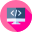 **TODO!**

Supprimez les informations du pokemon de votre choix, puis supprimez un pokemon au hasard

In [81]:
# Supprimer Pikachu
result = collection.delete_one({"Name": "Pikachu"})
print(f"{result.deleted_count} document(s) supprimé(s)")


0 document(s) supprimé(s)


Supprimez un pokemon au hasard

In [83]:
random_pokemon = collection.aggregate([{"$sample": {"size": 1}}])
for doc in random_pokemon:
    name = doc["Name"]
    # Supprimer ce document
    result = collection.delete_one({"Name": name})
    print(f"Pokémon aléatoire supprimé : {name} ({result.deleted_count} document)")

Pokémon aléatoire supprimé : Gengar (1 document)


#### 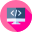 **TODO!**

Affichez les noms de chaque type1, séparés par un espace, à partir des collections de type1

In [87]:
collections = db.list_collection_names()

# Parcourir chaque collection correspondant à un type
for coll_name in collections:
    # On suppose que les collections de type sont celles présentes dans pokemons_by_type
    collection = db[coll_name]
    # Récupérer tous les documents et extraire les noms
    names = [doc["Name"] for doc in collection.find({}, {"_id": 0, "Name": 1})]
    # Affichage séparé par un espace
    print(f"{coll_name} :", " ".join(names))



Normal : Pidgey Pidgeotto Pidgeot Rattata Raticate Spearow Fearow Jigglypuff Wigglytuff Meowth Persian Farfetch'd Doduo Dodrio Lickitung Chansey Kangaskhan Tauros Ditto Eevee Porygon Snorlax Sentret Furret Hoothoot Noctowl Igglybuff Aipom Girafarig Dunsparce Teddiursa Ursaring Porygon2 Stantler Smeargle Miltank Blissey Zigzagoon Linoone Taillow Swellow Slakoth Vigoroth Slaking Whismur Loudred Exploud Azurill Skitty Delcatty Spinda Swablu Zangoose Castform Kecleon Starly Staravia Staraptor Bidoof Bibarel Ambipom Buneary Lopunny Glameow Purugly Happiny Chatot Munchlax Lickilicky Porygon-Z Regigigas Arceus Patrat Watchog Lillipup Herdier Stoutland Pidove Tranquill Unfezant Audino Minccino Cinccino Deerling Sawsbuck Bouffalant Rufflet Braviary Meloetta Bunnelby Diggersby Fletchling Furfrou Pidgey Pidgeotto Pidgeot Rattata Raticate Spearow Fearow Jigglypuff Wigglytuff Meowth Persian Farfetch'd Doduo Dodrio Lickitung Chansey Kangaskhan Tauros Ditto Eevee Porygon Snorlax Sentret Furret Hootho

KeyError: 'Name'

Et voilà~ ! Vous avez appris à utiliser MongoDB pour les opérations basiques :
- Create
- Read
- Update
- Delete

donc le CRUD 😃